![Data Cleaning](dataCleaning.png)

## Objectives

* Understand data cleaning and different data issues.
* Define, identify and handle duplicates and unwanted observations.
* Quanitify and Handle Missing values.
* Ensure wanted observations are well structured.
* Define, identify and filter out outliers.
* Validate Data Accuracy.
* Demonstrate use of ```Lambda``` functions. 

## What is Data Cleaning?

* Data cleaning refers to the process of identifying and correcting or removing incorrect, incomplete, incorrectly formatted, corrupted, duplicate or irrelevant data within the provided data.

Although tiresome, this is among the most important process of any data analytics or data science project as unwanted records my result in undesirable insights.

💡 **Remember:** _Garbage in garbage out_

There is no one outright and perfect way to stipulate the exact steps involved in the data cleaning phase because the processes will differ depending on the data at hand.



## What are the different types of data issues?

* **Missing Data** - No data value is stored for an attribute in an observation hence data ends up with missing fields.
* **Duplicated Entries** - An Entry that shares data with another entry.
* **Invalid Data** - This includes wrong data types and wrong data formats which in turn interferes with the analysis process.
* **Conflicting Data** - Occurs when there are same records with different attributes example grams and kgs.

## Loading Python Packages

In [1]:
# numpy for high level mathematical functions and working with Arrays
import numpy as np
# pandas data manipulation and analysis for tablular data
import pandas as pd
# seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

We will use the [students_data](https://drive.google.com/drive/folders/1NLTyHM5brBKr8PXO_glO9YYHJmbQ-6-o?usp=share_link).

🤔 **Recall** - Apart from ```pd.read_csv```, what other methods can one use to load tabular data into a pandas dataframe?

In [36]:
# loading the data
students = pd.read_csv("students_data.csv", index_col=0)
# using the index_col=0 argument avoid having the index column as unnamed:0

## Understanding the Data

Exploring a dataset before applying any methods or processes to it is quite essential in understanding what it contains. 

This will allow you generate questions that can be used to derive insights from the data to make informed business decisions.

### Inspecting the data

Let's display few rows of the data, the column names and the shape of the data.

In [37]:
# preview first 5 rows
students.head()

,names,admission number,house,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,NaN,NaN,81.0,39.0,50.0,30.0,59.0,99%,80%
1,"MUKUHA TIMOTHY, KAMAU",13243.0,NaN,NaN,85.0,74.0,68.0,49.0,78.0,38%,86%
2,"JOB, NGARA",13307.0,NaN,NaN,54.0,49.0,53.0,59.0,72.0,86%,62%
3,"CHEGE DAVID, KAMAU",13258.0,NaN,NaN,71.0,97.0,92.0,41.0,81.0,77%,80%
4,"RAMADHAN MUSA, TEPO",13363.0,NaN,NaN,40.0,84.0,74.0,82.0,89.0,64%,46%


In [38]:
# preview last 5 rows
students.tail()

,names,admission number,house,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
142,"TIMOTHY NDEDA, OBURA",13322634.0,Elgon,0,-78.0,40.0,99.0,70.0,49.0,99&,92&
143,"MUKUHA JERIEL, NGARA",1932845.0,Cherangani,321,94.0,780.0,420.0,71.0,88.0,56%,76%
144,"JOB, KAMAU",1430232.0,Nandi,"43,200",98.0,80.0,86.0,64.0,99.0,49%,69%
145,"CHEGE, KAMAU",159.0,Nandi,NaN,508.0,409.0,77.0,58.0,56.0,88%,84%
146,"RAMADHAN, MUSA",87.0,Cherangani,NaN,81.0,70.0,64.0,680.0,88.0,76%,72%


In [39]:
# the column names
def data_column(data):
    """Simple function that returns the columns in a DataFrame"""
    cols = list(data.columns)

    return cols


data_column(students)

['names',
 'admission number',
 'house',
 'balance',
 'english',
 'kiswahili',
 'mathematics',
 'science',
 'sst/cre',
 'Creative Arts',
 'music']

In [40]:
# shape of the data 
def data_shape(data):
    """Simple function to provide the shape of the data"""
    out = print(f"The DataFrame has:\n\t* {data.shape[0]} rows\n\t* {data.shape[1]} columns")

    return out

data_shape(students)

The DataFrame has:
	* 147 rows
	* 11 columns


The methods ```.info()``` and ```.describe()``` provide important overview of the data.

In [41]:
# info for overview of the data
students.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 146
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   names             147 non-null    object 
 1   admission number  124 non-null    float64
 2   house             26 non-null     object 
 3   balance           58 non-null     object 
 4   english           121 non-null    float64
 5   kiswahili         119 non-null    float64
 6   mathematics       130 non-null    float64
 7   science           117 non-null    float64
 8   sst/cre           132 non-null    float64
 9   Creative Arts     143 non-null    object 
 10  music             147 non-null    object 
dtypes: float64(6), object(5)
memory usage: 13.8+ KB


In [42]:
# describe for descriptive statistics
students.describe()


,admission number,english,kiswahili,mathematics,science,sst/cre
count,1.240000e+02,121.000000,119.000000,130.000000,117.000000,132.000000
mean,1.473303e+05,70.958678,74.764706,72.938462,68.179487,70.833333
std,1.211743e+06,45.884710,74.971035,35.293180,60.666928,18.617142
min,8.700000e+01,-78.000000,29.000000,32.000000,28.000000,29.000000
25%,1.326200e+04,54.000000,49.500000,55.500000,46.000000,54.750000
50%,1.330650e+04,71.000000,66.000000,71.000000,66.000000,73.000000
75%,1.335625e+04,83.000000,82.500000,86.000000,79.000000,87.000000
max,1.332263e+07,508.000000,780.000000,420.000000,680.000000,100.000000


Now that we have sense of the data that is available to us, we can focus on the irrelevant, incomplete and incorrect data entries before we proceed with any analysis.

📝 **Note** - Its important to note that data cleaning can re-occur in multiple phases during the analysis process. 

## Data Cleaning 

### Removal of Duplicate and Unwanted Observations

* **Duplicated Entries** - Complete carbon copy of rows or column values. 
* **Unwanted observations** - Irrelevant data records that don’t actually fit the specific problem you are trying to analyze or solve

In [43]:
# Duplicated entries
def identify_duplicates(data):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(students)

The Data has 8 duplicated rows.
This constitutes 5.442% of the data set.


In [44]:
# handling the duplicates 
def remove_duplicated_rows(data):
    """Simple Function to remove duplicated rows"""
    data.drop_duplicates(subset=None, keep="first", inplace=True)
    # confirm if the duplicated rows have been removed
    confirm = identify_duplicates(students)

    return confirm 


remove_duplicated_rows(students)

The Data has no duplicates


💡 **Remeber** - Columns that contain unique details such as Customer ID, Mobile Number should not be duplicated.

In [45]:
def unique_column_duplicates(data, column):
    """handling duplicates in unique column"""
    # empty list to store the duplicate bools
    duplicates = []
    for i in data[column].duplicated():
        duplicates.append(i)
    
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")


unique_column_duplicates(students, "admission number")

The column Admission Number has 47 duplicated rows.
This constitutes 33.813% of the data set.


From above, we can clearly point out that 47 students have the same admission number, which practically is not possible as each student is required to have a unique admission number.

In [46]:
# handling the unique column duplicates 
def remove_unique_column_duplicates(data, column):
    """Simple Function to remove duplicated rows"""
    data.drop_duplicates(subset=column, keep="first", inplace=True)
    # confirm if the duplicated rows have been removed
    confirm = unique_column_duplicates(students, "admission number")

    return confirm 


remove_unique_column_duplicates(students, "admission number")

The column Admission Number has no duplicates


### Missing value

While identifying these missing records proves to be easy, how to handle them often requires careful consideration as random fills or removal can lead to unforeseen results.

There are a couple of ways to deal with missing data but it is important to note that neither is the optimal way of doing so:

* **Dropping** - Deleting the records with missing values.
* **Replacing** - Updating Missing values with values, this values could be actual or approximate.

In [47]:
# identify missing 
def identify_missing_values(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(students)

The Data has missing values.


In [48]:
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(students)
missing_data

,Missing Values,Percentage(%)
house,74,0.804348
balance,51,0.554348
science,8,0.086957
kiswahili,7,0.076087
english,4,0.043478
mathematics,4,0.043478
sst/cre,4,0.043478
Creative Arts,3,0.032609
admission number,1,0.010870


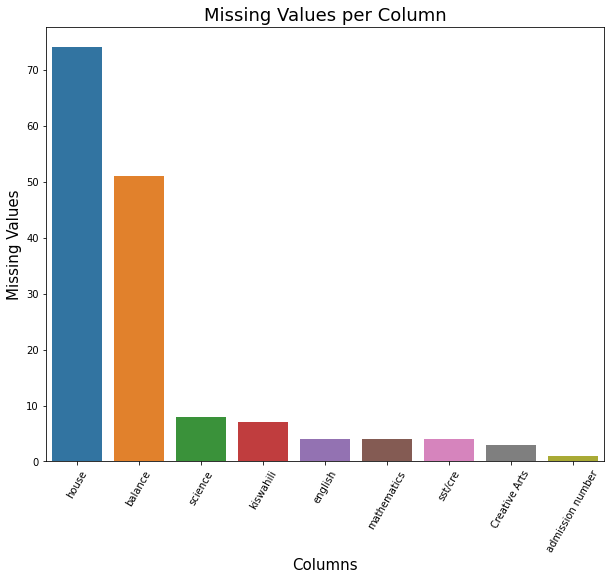

In [49]:
def graph_missing(data):
    """Graphically represent the missing values"""
    fig, axes = plt.subplots(figsize = (10, 8))

    # plot a bargraph
    sns.barplot(x = data.index , y = data["Missing Values"])
    # labeling the axes 
    plt.xlabel("Columns", fontdict={"color": "black", "size": 15})
    # rotating our xticks 
    plt.xticks(rotation = '60')
    # labeling the y axis 
    plt.ylabel("Missing Values", fontdict={"color": "black", "size": 15})
    # title 
    plt.title("Missing Values per Column", fontsize = 18)
    # display
    plt.show()

    # save the plot 
    fig.savefig("missing.png")


graph_missing(missing_data)

* The column **house** has ```80%``` of its values missing. Even if we are to take a guess, chances are we will most likely end up too much wrong information. Therefore, because of the amount of missing value we can safely drop the column house.

In [50]:
# drop missing values
def drop_missing_value(data, cols):
    """Simple function to drop columns"""
    data.drop(cols, axis = 1, inplace = True)
    
    # confirm columns have been dropped
    return data.columns


drop_missing_value(students, ["house"])

Index(['names', 'admission number', 'balance', 'english', 'kiswahili',
       'mathematics', 'science', 'sst/cre', 'Creative Arts', 'music'],
      dtype='object')

* The column **balance** has ```55%``` of its values missing. Is it therefore best to?
>> (A) Guess the fee balances of the remaining students.

>> (B) Replace with mean Fee balance. 

>> (C) Assume students with missing values have cleared their fees.

>> (D) Drop the column because the missing values are just too much.

>> (Wueh!) This life no balance 


In [56]:
def replace_data(data, to_replace, value, col, regex_value):
    """replace values in the given column"""
    data[col].replace(to_replace, value, inplace=True, regex=regex_value)
    
replace_data(students, np.nan, 0, "balance", False)

📝 **Note** If the argument regex is ```True``` then to_replace must be a string. 

You can read more about replace [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

The columns **english**, **kiswahili**, **mathematics**, **science**, **sst/cre** are numeric columns with a very low perentage of missing values. We can replace them with the mean scores in those subjects.

In [57]:
columns =['english', 'kiswahili', 'mathematics', 'science', 'sst/cre']
def fill_numeric_missing(data, cols):
    """Simple function to replace missing values"""
    for col in cols:
        data[col].fillna(data[col].mean(), inplace=True)

    # confirm remaining missing_values
    results = missing_values(students)

    return results


fill_numeric_missing(students, columns)   

,Missing Values,Percentage(%)
Creative Arts,3,0.032609
admission number,1,0.010870


The column **admission number** has one missing value. We can take a guess on this column, but chances are we can key in an exact number as another in the column and create a duplicate.

Since there is only one row missing we can safely drop the row.

In [58]:
def drop_row_missing(data, cols):
    """Simple function to drop row values with missing data in a specific column"""
    for col in cols:
        # drop along the row using axis = 0
        # specify the column using subset
        data.dropna(axis = 0, subset=col, inplace=True)
    
    # confirm the missing values dropped
    results = missing_values(students)

    return results

drop_row_missing(students, ["admission number"])

,Missing Values,Percentage(%)
Creative Arts,3,0.032967


What should we do about the column creative arts?

Columns creative arts and music have data stored in percentages. This should be numeric, but poor oh the computer doesn't understand this, don't get me wrong, computers are smart but only if you tell them to be.

### Fix Structural Issues

In [59]:
def remove_character(data, cols, characters):
    """simple function to remove characters"""
    # loop through the columns
    for col in cols:
        data[col] = data[col].str.strip(characters)

    return data.head()


remove_character(students, ['Creative Arts', 'music'], '%')

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,0,81.0,39.0,50.0,30.0,59.0,99,80
1,"MUKUHA TIMOTHY, KAMAU",13243.0,0,85.0,74.0,68.0,49.0,78.0,38,86
2,"JOB, NGARA",13307.0,0,54.0,49.0,53.0,59.0,72.0,86,62
3,"CHEGE DAVID, KAMAU",13258.0,0,71.0,97.0,92.0,41.0,81.0,77,80
4,"RAMADHAN MUSA, TEPO",13363.0,0,40.0,84.0,74.0,82.0,89.0,64,46


Even after removing the ```%``` sign, we still have to "explain" to the computer that this are actually numbers and not characters. 

🤔 **Thinking out Loud** - We can't convert missing value to numeric, can we?

In [60]:
# data types
students.dtypes

names                object
admission number    float64
balance              object
english             float64
kiswahili           float64
mathematics         float64
science             float64
sst/cre             float64
Creative Arts        object
music                object
dtype: object

In [61]:
# handle missing value in column Creative Arts
def fill_missing(data, col):
    """Simple function to replace missing values"""
    data[col].fillna(method='bfill', inplace=True)

    # confirm remaining missing_values
    results = identify_missing_values(students)

    return results


fill_missing(students, "Creative Arts")

The Data has no missing values


In [62]:
# list of all the values of the column creative arts 
creative_scores = students["Creative Arts"].to_list()

creative_scores

['99',
 '38',
 '86',
 '77',
 '64',
 '69',
 '44',
 '64',
 '86',
 '80',
 '86',
 '62',
 '46',
 '45',
 '59',
 '53',
 '93',
 '79',
 '79',
 '82',
 '93',
 '43',
 '78',
 '63',
 '42',
 '96',
 '75',
 '46',
 '82',
 '70',
 '70',
 '53',
 '96',
 '67',
 '82',
 '50',
 '81',
 '84',
 '59',
 '41',
 '95',
 '61',
 '68',
 '88',
 '69',
 '62',
 '100',
 '99',
 '100',
 '90',
 '86',
 '92',
 '62',
 '96',
 '74',
 '91',
 '39',
 '81',
 '38',
 '71',
 '47',
 '86',
 '77',
 '99',
 '32',
 '68',
 '84',
 '78',
 '99',
 '86',
 '68',
 '68',
 '62',
 '59',
 '96',
 '96',
 '96',
 '63',
 '71',
 '97',
 '40',
 '48',
 '51',
 '91',
 '78',
 '80',
 '99&',
 '56',
 '49',
 '88',
 '76']

There is a row value with ```99&``` and because of this we can't convert the column to numeric.

In [63]:
# remove the & sign 
remove_character(students, ['Creative Arts', 'music'], '&')

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,0,81.0,39.0,50.0,30.0,59.0,99,80
1,"MUKUHA TIMOTHY, KAMAU",13243.0,0,85.0,74.0,68.0,49.0,78.0,38,86
2,"JOB, NGARA",13307.0,0,54.0,49.0,53.0,59.0,72.0,86,62
3,"CHEGE DAVID, KAMAU",13258.0,0,71.0,97.0,92.0,41.0,81.0,77,80
4,"RAMADHAN MUSA, TEPO",13363.0,0,40.0,84.0,74.0,82.0,89.0,64,46


In [64]:
# change data types
def change_data_type(data, cols, type):
    """Simple function to change columns data type"""
    for col in cols:
        data[col] = data[col].astype(type)

    # confirm the data types
    out = data.dtypes

    return out


change_data_type(students, ["Creative Arts", "music"], 'int32')


names                object
admission number    float64
balance              object
english             float64
kiswahili           float64
mathematics         float64
science             float64
sst/cre             float64
Creative Arts         int32
music                 int32
dtype: object

When dealing with numbers, especially money, we are most likely to add the ```,``` to show thousands, millions etc. In the event we have such data, like in this case the column **balance**, the computer is going to categorize ```14,000``` as a string and not a number.

In [67]:
# remove the , character from balance
replace_data(students, ",", "", "balance", True)

📝 **Note** - Setting regex as ```True``` since the value we are replacing is a string.

In [68]:
# change column balance to numeric
change_data_type(students, ["balance"], 'float')

names                object
admission number    float64
balance             float64
english             float64
kiswahili           float64
mathematics         float64
science             float64
sst/cre             float64
Creative Arts         int32
music                 int32
dtype: object

### Outliers

Outliers are extreme data points that vary immensely from the other points. They are the hardest to detect among other data inaccuracies within the data in the sense that they are often of the same type as the other observations. Therefore, it is important to understand that just because they exist, doesn’t mean they are incorrect and as such, there should be a valid reason to remove these data points.

Because of the data that we have we are going to use "unconventional" techniques to handle this outliers.

```Z-score``` and ```IQR``` are common techniques used for identifying and removing outliers.

📝 _Just because they exist, doesn't mean they are wrong_.


In [70]:
def identify_extreme_score(data, columns):
    """Check if there are values greater than 100 and less than 0"""
    # empty list to store extreme points 
    extreme_score = []
    # loop through the columns
    for col in columns:
        # loop through column values
        for val in data[col]:
            # scores should be between 0 and 100 
            if (val > 100) or (val < 0):
                extreme_score.append(val)

    return extreme_score

scores_columns = ['english', 'kiswahili', 'mathematics', 'science', 'sst/cre', 'Creative Arts', 'music']
identify_extreme_score(students, scores_columns)

[-78.0, 508.0, 780.0, 409.0, 420.0, 680.0]

<AxesSubplot:xlabel='mathematics'>

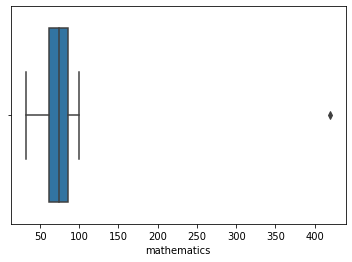

In [71]:
# we can also use a box plot to identify outliers

sns.boxplot(data=students, x="mathematics")

In [72]:
# using IQR
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    
    return outliers, Q1, Q3, IQR


maths_outliers = IQR_outliers(students, "mathematics")
maths_outliers[0]

[420.0]

In [73]:
# remove the outlier
def IQR_remove_outliers(data, column):
    """Simple function to remove the ouliers"""
    # get values from previous function 
    identify = IQR_outliers(data, column)
    Q1 = identify[1]
    Q3 = identify[2]
    IQR = identify[3]
    # remove the outliers
    df = data[~((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))]

    return df

students_data = IQR_remove_outliers(students, "mathematics")

<AxesSubplot:xlabel='mathematics'>

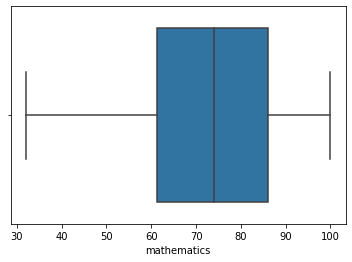

In [74]:
# confirm using a box plot

sns.boxplot(data=students_data, x="mathematics")

In [75]:
# what is happening
from matplotlib.cbook import boxplot_stats

stat = boxplot_stats(students_data["mathematics"])
stat

[{'mean': 72.66035353535354,
  'iqr': 24.75,
  'cilo': 69.9040598606669,
  'cihi': 78.0959401393331,
  'whishi': 100.0,
  'whislo': 32.0,
  'fliers': array([], dtype=float64),
  'q1': 61.25,
  'med': 74.0,
  'q3': 86.0}]

The value of the outlier is ```420.0``` which is above the maximum limit shown in the boxplot ```(whishi = 100.0)```. We do not have ant outlier below minimum limit ```(whislo = 32)```.

<AxesSubplot:xlabel='science'>

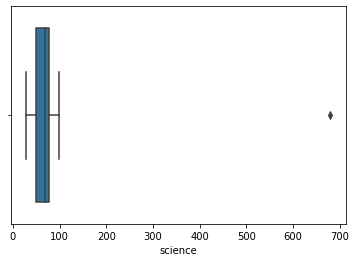

In [76]:
# check for outlier using boxplot
sns.boxplot(data=students_data, x="science")

In [77]:
# science outlier
science_outliers = IQR_outliers(students_data, "science")
science_outliers[0]

[680.0]

In [78]:
students_data = IQR_remove_outliers(students_data, "science")

<AxesSubplot:xlabel='science'>

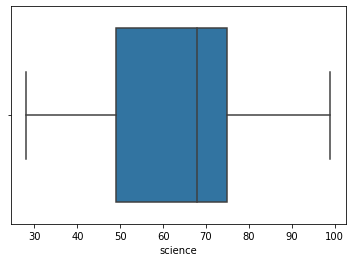

In [79]:
# confirm outlier been removed using boxplot
sns.boxplot(data=students_data, x="science")

Don't get tired, remember ouliers are not different from the other data points, they are just extreme, which in such a case, student scores, its not possible to have a score of more than 100% or less than 0%.

<AxesSubplot:xlabel='english'>

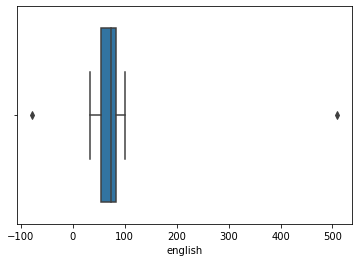

In [80]:
# check for outlier using boxplot
sns.boxplot(data=students_data, x="english")

In [81]:
# english outlier
english_outliers = IQR_outliers(students_data, "english")
english_outliers[0]

[-78.0, 508.0]

In [82]:
students_data = IQR_remove_outliers(students_data, "english")

<AxesSubplot:xlabel='english'>

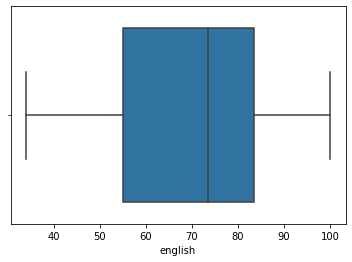

In [83]:
# confirm outlier been removed using boxplot
sns.boxplot(data=students_data, x="english")

<AxesSubplot:xlabel='kiswahili'>

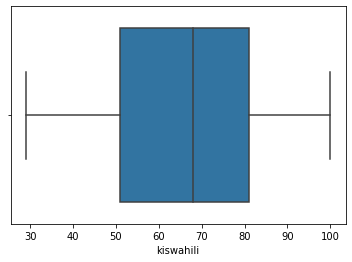

In [84]:
# check for outlier using boxplot
sns.boxplot(data=students_data, x="kiswahili")

There are no outliers in the **Kiwahili** column, _wangwana hawa_.

<AxesSubplot:xlabel='sst/cre'>

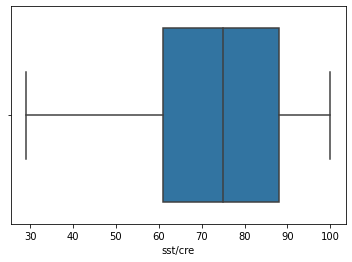

In [85]:
# check for outlier using boxplot
sns.boxplot(data=students_data, x="sst/cre")

There are no outliers in the **sst/cre**, seems they used the correct coordinates 😜!

<AxesSubplot:xlabel='Creative Arts'>

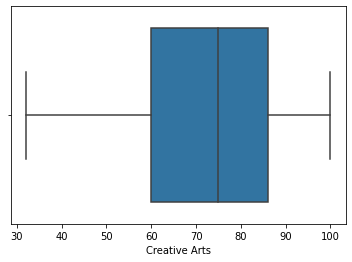

In [86]:

# check for outlier using boxplot
sns.boxplot(data=students_data, x="Creative Arts")

<AxesSubplot:xlabel='music'>

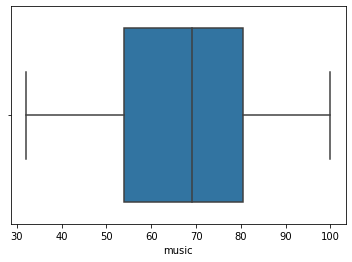

In [87]:
# check for outlier using boxplot
sns.boxplot(data=students_data, x="music")

<AxesSubplot:xlabel='admission number'>

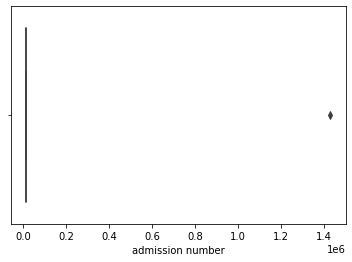

In [88]:
# check for outlier using boxplot
sns.boxplot(data=students_data, x="admission number")

In [89]:
# admission number outlier
admin_outliers = IQR_outliers(students_data, "admission number")
admin_outliers[0]

[1430232.0]

In [90]:
students_data = IQR_remove_outliers(students_data, "admission number")

<AxesSubplot:xlabel='admission number'>

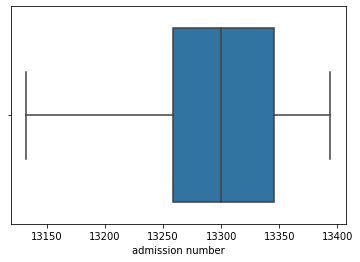

In [91]:
# confirm outlier been removed using boxplot
sns.boxplot(data=students_data, x="admission number")

<AxesSubplot:xlabel='balance'>

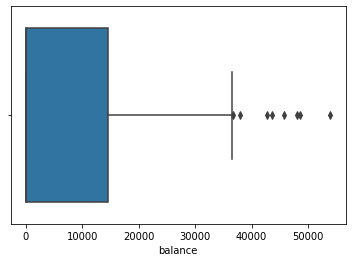

In [92]:
# check for outlier using boxplot
sns.boxplot(data=students_data, x="balance")

In [93]:
# balance outlier
balance_outliers = IQR_outliers(students_data, "balance")
balance_outliers[0]

[38000.0, 43554.0, 53963.0, 48656.0, 48028.0, 45685.0, 36713.0, 42760.0]

As much as the above balances are categorised as outliers, its practically possible to have such balances since they are not that extreme.

Do you think we should remove them?

What happens when the data is normally distributed?

In this scenario, we can determine the quartile from mean and median.

```Q1 = mean - 0.675 * stdev```
```Q3 = mean + 0.675 * stdev```

```Upper Limit = Q3 + 1.5 * IQR = mean + 2.7 * stdev```
```Lower Limit = Q1 - 1.5 * IQR = mean - 2.7 * stdev```

Alternatively, we can use the Z-score, preferably when the data is normally distributed.

### Final Data

In [95]:
# reset the index
students_data.reset_index(drop=True, inplace=True)

In [96]:
# preview first 5 columns
students_data.head()

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
0,"JERIEL NDEDA, OBURA",13259.0,0.0,81.0,39.0,50.0,30.0,59.0,99,80
1,"MUKUHA TIMOTHY, KAMAU",13243.0,0.0,85.0,74.0,68.0,49.0,78.0,38,86
2,"JOB, NGARA",13307.0,0.0,54.0,49.0,53.0,59.0,72.0,86,62
3,"CHEGE DAVID, KAMAU",13258.0,0.0,71.0,97.0,92.0,41.0,81.0,77,80
4,"RAMADHAN MUSA, TEPO",13363.0,0.0,40.0,84.0,74.0,82.0,89.0,64,46


In [98]:
# preview last 5 columns
students_data.tail()

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
81,"Anita Kahenya, Joy",13132.0,0.0,73.465909,77.811765,86.000000,69.952381,96.000000,48,69
82,"Bin Amin, Ng'eno",13159.0,0.0,58.000000,77.811765,76.477273,69.952381,74.079545,51,44
83,"Catherine Ndung'u, Kate",13187.0,0.0,84.000000,77.811765,68.000000,69.952381,48.000000,91,64
84,"Daisy Machoka, Daniel",13168.0,18161.0,73.465909,77.811765,76.477273,69.952381,74.079545,78,86
85,"Daniel Karanja, Wambui",13133.0,33619.0,78.000000,77.811765,78.000000,69.952381,29.000000,80,84


## Using Lambda functions

What is a lambda function?

Refers to an anonymous function (ie a function definition that is not bound to an identifier unless assigned one) intended as a shorthand function. 

They come in handy since one doesn't have to write multiple lines of code defining a function, and they are written inline.

### using ```.apply()```

In [103]:
# using lamda function to remove the decimals in the scores that resulted from replacing with mean
deci_columns = ["english", "kiswahili", "mathematics","science", "sst/cre"]

for col in deci_columns:
    students_data[col] = students_data[col].apply(lambda x: np.trunc(x))

# preview the data
students_data.tail()

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music
81,"Anita Kahenya, Joy",13132.0,0.0,73.0,77.0,86.0,69.0,96.0,48,69
82,"Bin Amin, Ng'eno",13159.0,0.0,58.0,77.0,76.0,69.0,74.0,51,44
83,"Catherine Ndung'u, Kate",13187.0,0.0,84.0,77.0,68.0,69.0,48.0,91,64
84,"Daisy Machoka, Daniel",13168.0,18161.0,73.0,77.0,76.0,69.0,74.0,78,86
85,"Daniel Karanja, Wambui",13133.0,33619.0,78.0,77.0,78.0,69.0,29.0,80,84


### using ```.assign()```

In [108]:
# lets find the students total
students_data = students_data.assign(Total = lambda x: x["english"] + x["kiswahili"] + x["mathematics"] + x["science"] + x["sst/cre"] + x["Creative Arts"] + x["music"])

In [110]:
students_data.head()

,names,admission number,balance,english,kiswahili,mathematics,science,sst/cre,Creative Arts,music,Total
0,"JERIEL NDEDA, OBURA",13259.0,0.0,81.0,39.0,50.0,30.0,59.0,99,80,438.0
1,"MUKUHA TIMOTHY, KAMAU",13243.0,0.0,85.0,74.0,68.0,49.0,78.0,38,86,478.0
2,"JOB, NGARA",13307.0,0.0,54.0,49.0,53.0,59.0,72.0,86,62,435.0
3,"CHEGE DAVID, KAMAU",13258.0,0.0,71.0,97.0,92.0,41.0,81.0,77,80,539.0
4,"RAMADHAN MUSA, TEPO",13363.0,0.0,40.0,84.0,74.0,82.0,89.0,64,46,479.0


## Desert

![desert](dessert.jpg)

[Photo by Suzy Hazelwood](https://www.pexels.com/photo/cheesecake-1126359/)

### Write a function that can be used by the school finance department. The user should enter the admission number of the student and the function returns the fee balance.

In [111]:
## code goes here

### Supposing you are the teacher, and you want to know the grades of your student, first allocate grades to the students depending on their total and then wtite code that the teacher can enter the admission number and returns the grade of the specific student.

In [112]:
## code goes here

### Parents wouldn't mind a colorful visual of their students performance, wouldn't they? Create a visual showing the performance of an individual student in the respective subjects.

In [113]:
## code goes here